## Tabular Data Binary Classification

by: Afonso Proenca

In [1277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.optim as optim
from torch.autograd import Variable
from torch.utils.data import Dataset, DataLoader

from sklearn.preprocessing import StandardScaler    
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

Generate random points (X) and random binary (0 or 1) class (y) and convert them to tabular data (.csv):

torch.Size([2000, 50])
torch.Size([2000, 1])


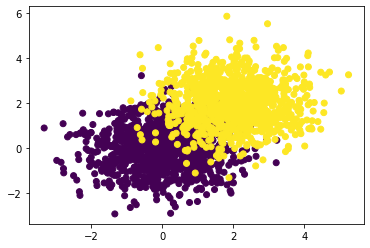

In [1278]:
# Generate random data points
X1 = torch.randn(1000, 50)
X2 = torch.randn(1000, 50) + 2
X = torch.cat([X1, X2], dim=0)

# Generate random binary class [0-1]
Y1 = torch.zeros(1000, 1)
Y2 = torch.ones(1000, 1)
Y = torch.cat([Y1, Y2], dim=0)

print(X.size())
print(Y.size())

plt.scatter(X[:, 0], X[:, 1], c=Y)

In [1279]:
# Create dataframe and write to disk
df = pd.DataFrame(X.numpy(),Y.numpy().reshape(len(Y)))
df.index.name = 'class'
df.to_csv('data/tabularDataBinaryClassification.csv')

# Read dataframe from disk
df = pd.read_csv("data/tabularDataBinaryClassification.csv")
df.head()

XN = df.to_numpy()
X = torch.Tensor(XN[:,1:])
Y = torch.Tensor(XN[:,0])

print(X.shape,Y.shape)

torch.Size([2000, 50]) torch.Size([2000])


In [1280]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

X_train = torch.Tensor(X_train).type(torch.FloatTensor)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train = Y_train.type(torch.FloatTensor)

net = Net()
opt = optim.Adam(net.parameters(), lr=0.001, betas=(0.9, 0.999))
criterion = nn.BCELoss()

In [1281]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(50, 50)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(50, 100)
        self.prelu = nn.PReLU(1)
        self.out = nn.Linear(100, 1)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.out(h2)
        y = self.out_act(a3)
        return y

In [1282]:
def train_epoch(model, opt, criterion, batch_size=50):
    model.train()
    losses = []
    for beg_i in range(0, X.size(0), batch_size):
        x_batch = X_train[beg_i:beg_i + batch_size, :]
        y_batch = Y_train[beg_i:beg_i + batch_size, :]
        x_batch = Variable(x_batch)
        y_batch = Variable(y_batch)

        opt.zero_grad()
        # (1) Forward
        y_hat = net(x_batch)
        # (2) Compute diff
        loss = criterion(y_hat, y_batch)
        # (3) Compute gradients
        loss.backward()
        # (4) update weights
        opt.step()        
        losses.append(loss.data.numpy())
    return losses

In [1283]:
e_losses = []
num_epochs = 100
for e in range(num_epochs+1):
    e_losses += train_epoch(net, opt, criterion)
    if e % 10 == 0:
        print('Epoch:',e ,' Loss:', e_losses[e])

Epoch: 0  Loss: 0.6592834
Epoch: 10  Loss: 0.39533243
Epoch: 20  Loss: 0.3665983
Epoch: 30  Loss: 0.32674882
Epoch: 40  Loss: 0.19736177
Epoch: 50  Loss: 0.14703752
Epoch: 60  Loss: 0.108934015
Epoch: 70  Loss: 0.084638216
Epoch: 80  Loss: 0.049631547
Epoch: 90  Loss: 0.023674997
Epoch: 100  Loss: 0.018211117


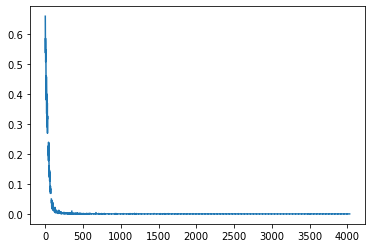

In [1284]:
plt.plot(e_losses)

Loss after training: 4.857397289015353e-05
Accuracy after training: 1.0
torch.Size([400]) (400, 1)
torch.Size([400]) (400, 1)
Confusion Matrix:
[[194   0]
 [  0 206]]


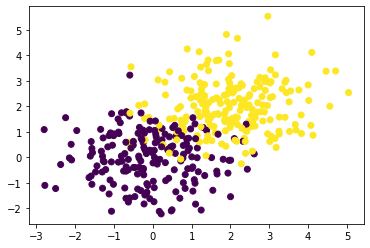

In [1285]:
Y_test = Y_test.reshape(len(Y_test))
X_test = torch.Tensor(X_test).type(torch.FloatTensor)

model.eval()

Y_pred = net(X_test)
loss = criterion(Y_pred.squeeze(), Y_test)  

Y_pred = Y_pred.round().detach().numpy()
accuracy = accuracy_score(Y_pred,Y_test)

print('Loss after training:' , loss.item())
print('Accuracy after training:', accuracy)

plt.scatter(X_test[:, 0], X_test[:, 1], c=Y_pred)

print(Y_test.shape, Y_pred.shape)
print(Y_test.shape,Y_pred.shape)

print('Confusion Matrix:')
print(confusion_matrix(Y_test, Y_pred))